In [1]:
#import libraries
import torch #model algorithm
from IPython.display import Image #image 
import shutil
import os #file open
from random import choice 

In [2]:
#git intilization
!git init

Reinitialized existing Git repository in C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/.git/


In [3]:
#YOLOV5 LOADING FOLDERS
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
%cd yolov5/

c:\Users\Farah Alarbid\Downloads\Compressed\JordanianTrafficSigns\yolov5


In [5]:
#install requirements
!pip install -r requirements.txt

In [6]:
imgs = []
txts=[]

train_path = "/Final_Dataset/images/train"
val_path = "/Final_Dataset/images/val"
crs_path = "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/Final_Dataset"

In [7]:
import os
from PIL import Image

dataset_path = 'C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/Final_Dataset'

imgs_train = []
imgs_val = []
imgs_test = []
labels_train = []
labels_val = []
labels_test = []

for split in ['train', 'val', 'test']:
    # Image folder
    img_folder = os.path.join(dataset_path, 'images', split)
    # Label folder
    label_folder = os.path.join(dataset_path, 'labels', split)
    
    # Iterate over the images in the folder
    for filename in os.listdir(img_folder):
        img_path = os.path.join(img_folder, filename)
        # Open and store the image
        with Image.open(img_path) as img:
            # Append the image to the respective split
            if split == 'train':
                imgs_train.append(img)
            elif split == 'val':
                imgs_val.append(img)
            elif split == 'test':
                imgs_test.append(img)
    
    # Iterate over the labels in the folder
    for filename in os.listdir(label_folder):
        label_path = os.path.join(label_folder, filename)
        # Open and read the label file
        with open(label_path, 'r') as f:
            label = f.read()
        
        # Append the label to the respective split
        if split == 'train':
            labels_train.append(label)
        elif split == 'val':
            labels_val.append(label)
        elif split == 'test':
            labels_test.append(label)




In [8]:
count_for_train = int(len(imgs_train))
print("training images are : ",count_for_train)

training images are :  6923


In [9]:
#training the (train.py) batch size =16, epochs=10, data path, weights=initial yolo weights
!wandb disabled
!python "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/train.py" --img 415 --batch 16 --epochs 10 --data "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/data.yaml" --weights yolov5s.pt --cache --workers 2


W&B disabled.
^C


In [10]:
!dir "C:\Users\Farah Alarbid\Downloads\Compressed\Traffic_signs_yolo\yolov5\runs\train\exp2"

 Volume in drive C has no label.
 Volume Serial Number is 8AE4-219A

 Directory of C:\Users\Farah Alarbid\Downloads\Compressed\Traffic_signs_yolo\yolov5\runs\train\exp2

06/18/2023  12:34 PM    <DIR>          .
06/18/2023  12:34 PM    <DIR>          ..
06/18/2023  12:34 PM                88 events.out.tfevents.1687080897.DESKTOP-KT7332V.13932.0
06/18/2023  12:34 PM               401 hyp.yaml
06/18/2023  12:34 PM             1,103 opt.yaml
06/18/2023  12:34 PM    <DIR>          weights
               3 File(s)          1,592 bytes
               3 Dir(s)  194,684,219,392 bytes free


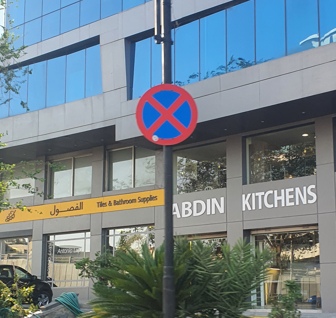

In [17]:
from PIL import Image
from IPython.display import display

# image_path = r"C:\Users\Farah Alarbid\Downloads\Compressed\JordanianTrafficSigns\Final_Dataset\images\test\Ag33.png"
image_path="C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/pic4.PNG"
image = Image.open(image_path)
display(image)

In [18]:
from PIL import Image
from IPython.display import display

model_path="C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/runs/train/exp2/weights/best.pt"
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Farah Alarbid/.cache\torch\hub\master.zip
YOLOv5  2023-6-20 Python-3.10.9 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [19]:
results = model(image_path)

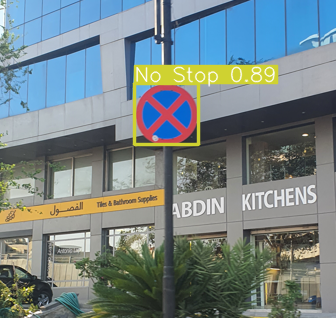

In [20]:
results.show()

In [23]:
classes = { 1:'No Entry',
            2:'Hump',
            3:'Stop',
            4:'Pedestrain Cross',
            5: 'No Stop',
            6: 'Give way',
            7:'Pass Either' }

In [39]:
predicted_labels = []  # Initialize the list to store predicted labels
images_files_test = [img.filename for img in imgs_test] # imgs_test contains object image file and images_files_test contains paths

# Iterate over the test images and predict labels
for image in images_files_test:
    predicted_label = model(image)  # Use object detection model to predict the label
    predicted_labels.append(predicted_label)  # Add the predicted label to the list


In [68]:
predicted_label
info=str(predicted_label)
info

splitted=info.split()
splitted


['image',
 '1/1:',
 '421x486',
 '1',
 'Stop',
 'Speed:',
 '28.0ms',
 'pre-process,',
 '500.5ms',
 'inference,',
 '3.0ms',
 'NMS',
 'per',
 'image',
 'at',
 'shape',
 '(1,',
 '3,',
 '576,',
 '640)']

In [46]:
predicted_labels #yolo objects

[YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 391x538 1 Give Way, 1 Pass Either
 Speed: 27.0ms pre-process, 444.4ms inference, 17.0ms NMS per image at shape (1, 3, 480, 640),
 YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 388x577 2 Humps, 1 Pedestrian Cross
 Speed: 13.0ms pre-process, 396.4ms inference, 4.0ms NMS per image at shape (1, 3, 448, 640),
 YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 567x1098 1 Hump, 1 No Stop
 Speed: 27.0ms pre-process, 427.4ms inference, 1.0ms NMS per image at shape (1, 3, 352, 640),
 YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 533x842 1 Hump, 1 Pedestrian Cross
 Speed: 26.0ms pre-process, 380.3ms inference, 1.0ms NMS per image at shape (1, 3, 416, 640),
 YOLOv5 <class 'models.common.Detections'> instance
 image 1/1: 555x1089 1 Hump
 Speed: 33.0ms pre-process, 327.3ms inference, 4.0ms NMS per image at shape (1, 3, 352, 640),
 YOLOv5 <class 'models.common.Detections'> instance
 image 1/

Validation

In [44]:
!python "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/val.py" --batch 32 --data "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/data.yaml" --weights "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/runs/train/exp2/weights/best.pt" --task test --project 'Jordan_traffic' --name 'Test' --augment

val: data=C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/data.yaml, weights=['C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='Jordan_traffic', name='Test', exist_ok=False, half=False, dnn=False
fatal: cannot change to 'C:\Users\Farah': No such file or directory
YOLOv5  2023-6-19 Python-3.10.9 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs

test: Scanning C:\Users\Farah Alarbid\Downloads\Compressed\JordanianTrafficSigns\Final_Dataset\labels\test...:   0%|          | 0/700 [00:00<?, ?it/s]
test: Scanning C:\Users\Farah Alarbid\Downloads\Compressed\JordanianTrafficSigns\Final_Dataset\labels\test... 1 images, 0 backgro

In [1]:
!python "yolov5\detect.py" --weights "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/runs/train/exp2/weights/best.pt" --source "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/Final_Dataset/images/test" 

detect: weights=['C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/runs/train/exp2/weights/best.pt'], source=C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/Final_Dataset/images/test, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'C:\Users\Farah': No such file or directory
YOLOv5  2023-6-19 Python-3.10.9 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/700 C:\Users\Farah Alarbid\Downloads\Compressed\JordanianTrafficSigns\Final_Dataset\images\test\Ag1000.png: 480x640 1 Give Way, 1 Pass Either, 290

In [3]:
!python "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/export.py" --weights "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/runs/train/exp2/weights/best.pt" --include tflite --img 640

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 640, 640, 3)]   0           []                               
                                                                                                  
 tf_conv (TFConv)               (1, 320, 320, 32)    3488        ['input_1[0][0]']                
                                                                                                  
 tf_conv_1 (TFConv)             (1, 160, 160, 64)    18496       ['tf_conv[0][0]']                
                                                                                                  
 tfc3 (TFC3)                    (1, 160, 160, 64)    18624       ['tf_conv_1[0][0]']              
                                                                                              

export: data=C:\Users\Farah Alarbid\Downloads\Compressed\JordanianTrafficSigns\yolov5\data\coco128.yaml, weights=['C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/runs/train/exp2/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
fatal: cannot change to 'C:\Users\Farah': No such file or directory
YOLOv5  2023-6-19 Python-3.10.9 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from C:\Users\Farah Alarbid\Downloads\Compressed\JordanianTrafficSigns\yolov5\runs\train\exp2\weights\best.pt with output shape (1, 25200, 12) (54.1 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

                 from  n    params

In [1]:
#export as torchscript in runs/exp2/weights
!python "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/export.py" --weights "C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/runs/train/exp2/weights/best.pt" --include torchscript --img 640 --optimize

export: data=C:\Users\Farah Alarbid\Downloads\Compressed\JordanianTrafficSigns\yolov5\data\coco128.yaml, weights=['C:/Users/Farah Alarbid/Downloads/Compressed/JordanianTrafficSigns/yolov5/runs/train/exp2/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=True, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
fatal: cannot change to 'C:\Users\Farah': No such file or directory
YOLOv5  2023-6-19 Python-3.10.9 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from C:\Users\Farah Alarbid\Downloads\Compressed\JordanianTrafficSigns\yolov5\runs\train\exp2\weights\best.pt with output shape (1, 25200, 12) (54.1 MB)

TorchScript: starting export with torch 2.0.1+cpu...
TorchScript: export success  4.5s, saved as